In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r'C:\Users\hp\Downloads\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
df.shape

(1000, 8)

In [296]:
df.describe()

,math_score,reading_score,writing_score,total
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


### data cleaning
- rename race/ethnicity to ethnicity
- remove spaces in column names
- clean null values if present
- explore unique values in catagorical columns
- fix dtypes of the columns if needed
- replace 'none' to 'not completed' in `test preration cource`
- check duplicate rows
- add new column called `division` which gives studet 'first', 'second', 'third' or fail according to total marks.
<br>
total marks above 180 : first division
<br>
total marks between 150 to 179 : Second Division
<br>
total marks between 90 to 149 : Third Divison
<br>
total marks below 90 : Fail
<br>

### EDA
- Average marks of a student in all 3 subjects. 
- Which student got the highest marks in total?
- which student got the lowest marks in total?
- What is the average score of students in each subjects? hint: #make box plot of each subject
- Ratio of Male and Female students. hint: #pie chart
- Ratio of ethnicity of students. hint: # pie chart
- On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)
- Which gender perfomed better overall? hint: #bar plot
- Which gender performed better in each group?  hint: #bar
- How many students have failed and which group have the most? 
- Students got more marks than others whose parents have higer education degree?
- Those students whose completed their course got more grades in compare to those student who didn't?

In [27]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


### rename race/ethnicity to ethnicity


In [28]:
df.rename(columns = {'race/ethnicity':'ethnicity'}, inplace= True)

In [29]:
df.head(1)

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


### remove spaces in column names


In [30]:
col = df.columns
col

Index(['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [31]:
df.columns= [x.replace(' ', '_') for x in col]
df.columns

Index(['gender', 'ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [37]:
df.dropna(inplace= True)
df.shape

(1000, 8)

### explore unique values in catagorical columns


In [297]:
print(df.gender.unique())
print(df.ethnicity.unique())
print(df.lunch.unique())
print(df.parental_level_of_education.unique())
print(df.test_preparation_course.unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['not completed' 'completed']


### fix dtypes of the columns if needed


In [44]:
df.dtypes

gender                         object
ethnicity                      object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### replace 'none' to 'not completed' in `test preration course`


In [51]:
df.test_preparation_course= df.test_preparation_course.apply(lambda x: 'not completed' if x=='none' else x)

In [52]:
df.test_preparation_course.unique()

array(['not completed', 'completed'], dtype=object)

### check duplicate rows


In [60]:
df.duplicated().sum()

0

### add new column called division which gives studet 'first', 'second', 'third' or fail according to total marks. -->

In [62]:
df.head(1)

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,not completed,72,72,74


In [75]:
df.loc[(((df.math_score)+(df.reading_score)+(df.writing_score)))<90, ['division']]= 'Fail'

In [76]:
df.loc[((df.math_score)+(df.reading_score)+(df.writing_score)>=90) & ((df.math_score)+(df.reading_score)+(df.writing_score)<=149), ['division']]= 'Thrid'

In [77]:
df.loc[((df.math_score)+(df.reading_score)+(df.writing_score)>=150) & ((df.math_score)+(df.reading_score)+(df.writing_score)<=179), ['division']]= 'Second'

In [78]:
df.loc[((df.math_score)+(df.reading_score)+(df.writing_score)>=180), ['division']]= 'First'

In [79]:
df.division.unique()

array(['First', 'Thrid', 'Second', 'Fail'], dtype=object)

### EDA

### Average marks of a student in all 3 subjects.


In [197]:
mean_= (df.math_score+df.reading_score+df.writing_score).mean
mean_

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64>

### Which student got the highest marks in total?


In [193]:
df.sort_values('total', ascending= False)[0:3] 

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,division,total
916,male,group E,bachelor's degree,standard,completed,100,100,100,First,300
458,female,group E,bachelor's degree,standard,not completed,100,100,100,First,300
962,female,group E,associate's degree,standard,not completed,100,100,100,First,300


### which student got the lowest marks in total?


In [194]:
df.sort_values('total')[0:1]

,gender,ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,division,total
59,female,group C,some high school,free/reduced,not completed,0,17,10,Fail,27


### What is the average score of students in each subjects? hint: #make box plot of each subject


Text(0.5, 1.0, 'Writing_score')

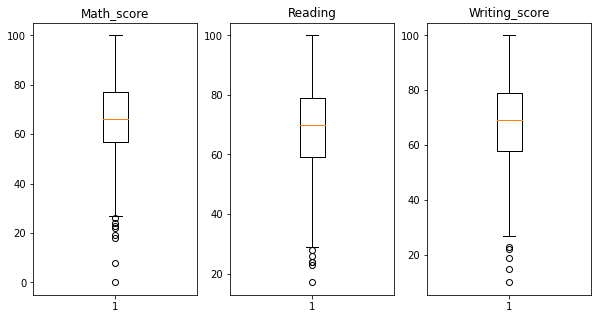

In [300]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.boxplot(df.math_score)
plt.title('Math_score')

plt.subplot(1,3,2)
plt.boxplot(df.reading_score)
plt.title('Reading')


plt.subplot(1,3,3)
plt.boxplot(df.writing_score)
plt.title('Writing_score')


### Ratio of Male and Female students. hint: #pie chart


In [124]:
gen= df.gender.value_counts()
gen

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Male vs Female')

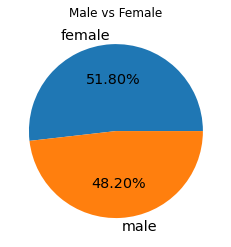

In [205]:
plt.pie(x= gen, labels= gen.index, autopct= '%0.2f%%', textprops= {'size': 'x-large'})
plt.title('Male vs Female')

### Ratio of ethnicity of students. hint: # pie chart


In [126]:
eth= df.ethnicity.value_counts()
eth

group C    319
group D    262
group B    190
group E    140
group A     89
Name: ethnicity, dtype: int64

Text(0.5, 1.0, 'Ethnicity')

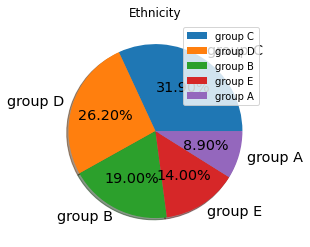

In [204]:
plt.pie(x= eth, labels= eth.index, autopct= '%0.2f%%', textprops= {'size': 'x-large'},shadow = True)
plt.legend()
plt.title('Ethnicity')

### On an average which group performed the best in total marks? hint: group by then pivot table (col = gen, index= eth, val = total)

In [289]:
pivot_table = df.pivot_table(index="ethnicity", columns="gender", values="total", aggfunc="mean")
pivot_table

gender,female,male
ethnicity,,
group A,195.388889,184.622642
group B,202.528846,189.000000
group C,205.755556,195.748201
group D,214.317829,200.962406
group E,222.188406,214.436620


In [147]:
df['total']= df.math_score+df.reading_score+df.writing_score

### Which gender perfomed better overall? hint: #bar plot


<AxesSubplot:xlabel='gender', ylabel='total'>

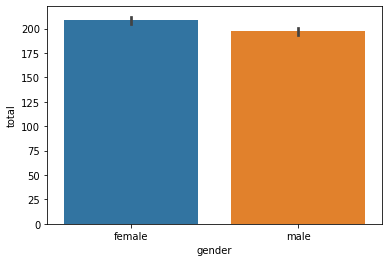

In [151]:
sns.barplot(x='gender', y='total', data= df)

### Which gender performed better in each group? hint: #bar


<AxesSubplot:xlabel='ethnicity', ylabel='total'>

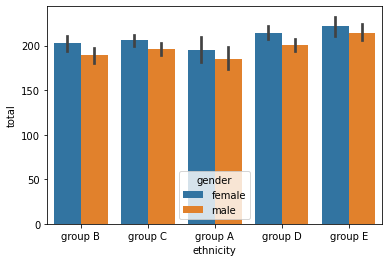

In [277]:
sns.barplot(x='ethnicity', y='total', hue= 'gender', data= df)

### How many students have failed and which group have the most?

In [278]:
df.division.value_counts()

First     715
Second    182
Thrid      94
Fail        9
Name: division, dtype: int64

In [243]:
df1= df.loc[(df.division)=='Fail']
df1.groupby('ethnicity')['division'].count()

ethnicity
group A    1
group B    5
group C    2
group E    1
Name: division, dtype: int64

Ans: There are 9 students who failed overall and `Group B` has the most students who failed which is 5. 

### Students got more marks than others whose parents have higer education degree?


In [251]:
df2= df.loc[((df.division)=='First')]
df2.groupby('parental_level_of_education')['division'].count()

parental_level_of_education
associate's degree    163
bachelor's degree      97
high school           120
master's degree        49
some college          171
some high school      115
Name: division, dtype: int64

<AxesSubplot:xlabel='parental_level_of_education', ylabel='total'>

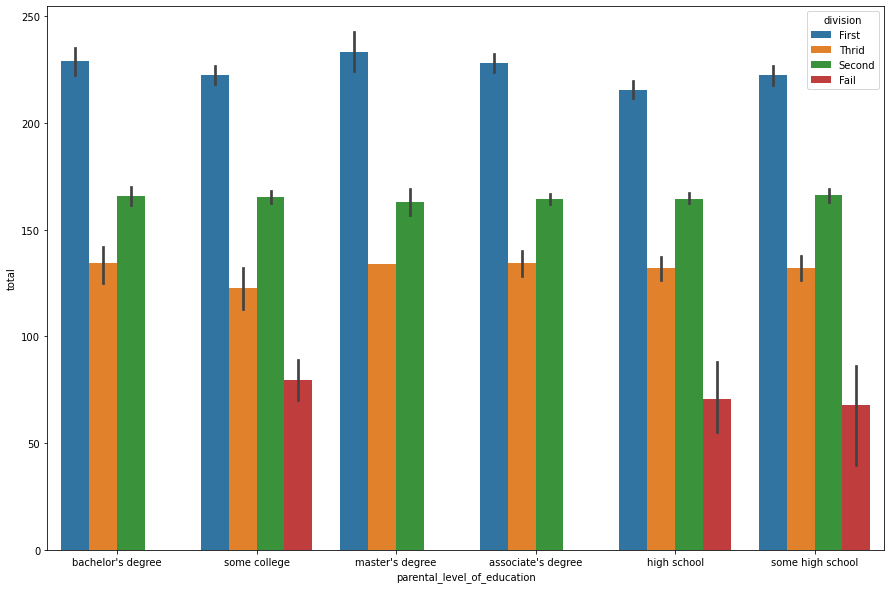

In [295]:
plt.figure(figsize=(15,10))
sns.barplot(x='parental_level_of_education', y='total', hue= 'division', data= df)

### Those students whose completed their course got more grades in compare to those student who didn't?


In [304]:
df.groupby('test_preparation_course')['division'].value_counts()

test_preparation_course  division
completed                First       298
                         Second       42
                         Thrid        18
not completed            First       417
                         Second      140
                         Thrid        76
                         Fail          9
Name: division, dtype: int64

Answer: No, students who have not completed the course got more grades in comparision with thoses who completed the course

In [298]:
!jt -r

Reset css and font defaults in:
C:\Users\hp\.jupyter\custom &
C:\Users\hp\AppData\Roaming\jupyter\nbextensions
